# imports

In [1]:
import os
import sys

import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision

sys.path.append("../")
from training.utils import dataloader, GaussianBlurAll

%matplotlib inline

# arguments

In [2]:
OUT_DIR = "./images/"
if not os.path.exists(OUT_DIR):
    os.makedirs(OUT_DIR)

In [3]:
sigma = 1
radius = sigma * 3 * 2 + 1
kernel_size = (radius, radius)  # It's also okay to set (0,0) as kernel_size.

# functions

In [4]:
def imshow(img, title="", filename="", scale=True):
    img = img / 2 + 0.5  # unnormalize
    if type(img) == torch.Tensor:
        img = img.numpy()
        plt.imshow(np.transpose(img, (1, 2, 0)))
    else:  # if type(img) == numpy.ndarray
        plt.imshow(img)
    if not scale:
        plt.xticks([])  # if you want to remove scale axes
        plt.yticks([])
    if title:
        plt.title(title)
    if filename:
        plt.savefig(filename)  # added for saving the image
    plt.show()

# load dataset (Cifar-10)

In [5]:
trainloader, testloader, classes = dataloader(32)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

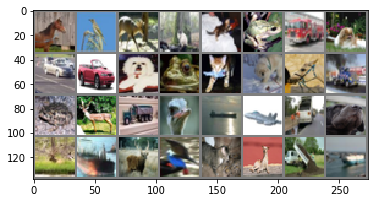

In [7]:
# show images
imshow(torchvision.utils.make_grid(images))

# blur half of the batch

In [8]:
half = images.size(0) // 2
images[:half].size()

torch.Size([16, 3, 32, 32])

In [9]:
images.chunk(2)[0].size()

torch.Size([16, 3, 32, 32])

In [10]:
half1, half2 = images.chunk(2)

In [11]:
half1.size()

torch.Size([16, 3, 32, 32])

In [12]:
torch.cat((half1, half2))

tensor([[[[ 0.1451, -0.0510, -0.0588,  ...,  0.2314,  0.2000,  0.0902],
          [ 0.0824, -0.0510, -0.0667,  ...,  0.2000,  0.1373,  0.0588],
          [ 0.1137, -0.0745, -0.0039,  ...,  0.1765,  0.1294,  0.0588],
          ...,
          [-0.2549, -0.2314, -0.1765,  ..., -0.8431, -0.8431, -0.8431],
          [-0.2000, -0.1843, -0.1451,  ..., -0.6000, -0.7176, -0.7412],
          [-0.2392, -0.2471, -0.2392,  ..., -0.3333, -0.4588, -0.4196]],

         [[ 0.0667, -0.1216, -0.1294,  ...,  0.1451,  0.1059, -0.0039],
          [ 0.0118, -0.1216, -0.1373,  ...,  0.1137,  0.0510, -0.0275],
          [ 0.0431, -0.1451, -0.0745,  ...,  0.0902,  0.0431, -0.0275],
          ...,
          [-0.2627, -0.2471, -0.2235,  ..., -0.9137, -0.9059, -0.9137],
          [-0.0824, -0.0745, -0.0667,  ..., -0.5922, -0.7176, -0.7412],
          [-0.1059, -0.1373, -0.1451,  ..., -0.2549, -0.3882, -0.3490]],

         [[ 0.0275, -0.1608, -0.1686,  ...,  0.0980,  0.0588, -0.0510],
          [-0.0275, -0.1608, -

In [13]:
half1_blur = GaussianBlurAll(half1, kernel_size=kernel_size, sigma=sigma)

In [14]:
output = torch.cat((half1_blur, half2))

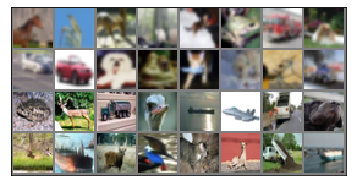

In [15]:
# show images
filename = "./images/blur-half-data.png"
imshow(torchvision.utils.make_grid(output), filename=filename, scale=False)